In [1]:
# install required system dependencies
!apt-get install -y xvfb x11-utils  
!apt-get install x11-utils > /dev/null 2>&1
!pip install PyOpenGL==3.1.* \
            PyOpenGL-accelerate==3.1.* \
            gym[box2d]==0.17.* 
!pip install pyglet
!pip install ffmpeg
! pip install pyvirtualdisplay
!pip install Image
!pip install gym-maze-trustycoder83

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
!mkdir ./vid
!rm ./vid/*.*

mkdir: cannot create directory ‘./vid’: File exists


In [3]:
# Import libraries and namespaces
import time
from random import seed
from random import randint
import numpy as np

x_train = np.zeros( (100, 2) )
y_train = np.zeros( 100 )
for i in range(100):
    # seed random number generator with the system clock
    seed(time.clock())
        
    # generate random integers between zero and two
    x_train[i,0] = randint(0,1)
    x_train[i,1] = randint(0,1)
    y_train[i] = np.logical_xor(x_train[i,0],x_train[i,1])
    
x_test = [[1,1],[1,0],[0,1],[0,0]]
y_test = [0,1,1,0]

# Converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

# Print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(4, 2) (4,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


In [4]:
import sys
# import pygame
import numpy as np
# import math
# import base64
# import io
# import IPython
import gym
import gym_maze

# from gym.wrappers import Monitor
# from IPython import display
from pyvirtualdisplay import Display
from gym.wrappers.monitoring import video_recorder

d = Display()
d.start()

# Recording filename
video_name = "./vid/Practical_2.mp4"

# Setup the environment for the maze
env = gym.make("maze-sample-10x10-v0")

# Setup the video
vid = None
vid = video_recorder.VideoRecorder(env,video_name)

# env = gym.wrappers.Monitor(env,'./vid',force=True)
current_state = env.reset()


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
#optimistic

In [6]:
states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
total_episode_reward_sum=0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))


# Number of episode we will run
n_episodes = 200

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability to 
exploration_proba = 5

#Exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.01

# Minimum of exploration prob
max_exploration_proba = 1
min_exploration_proba = 0.01

# Learning rate
lr = 0.1

rewards_per_episode = list()


# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0

    for i in range(max_iter_episode): 
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]
        exploration_rate_threshold=np.random.uniform(0,1)
        if  exploration_rate_threshold> exploration_proba:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))
        else:
          action = env.action_space.sample()

        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        Q_table[current_Q_table_coordinates, action] = (1-lr) *Q_table[current_Q_table_coordinates, action] +lr*(reward + max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state

    #Show the total episode reward        
    print("Total episode reward:", total_episode_reward)
    total_episode_reward_sum+= total_episode_reward
    #Reset enviroment for next episode
    current_state = env.reset()
    #exploration rate decay
    exploration_proba = min_exploration_proba + (max_exploration_proba - min_exploration_proba) * np.exp(-exploration_decreasing_decay*e)
    rewards_per_episode.append(total_episode_reward)

    # Save video episode and close
print("Video successfuly saved.")
vid.close()
vid.enabled = False
Q_table1= Q_table

Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6129999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6609999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6749999999999998
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.6629999999999998
Total episode reward: 0.7139999999999997
Total episode reward: 0.6779999999999997
Total episode reward: 0.7899999999999998
Total episode reward: 0.6279999999999997
Total episode reward: 0.7469999999999999
Total episode reward: 0.7739999999999998
Total episode reward: 0.8269999999999998
Total episode reward: 0.6029999999999998
Total episode reward: 0.8299999999999998
Total episode reward: 0.8779999999999999
Total episode reward: 0.8629999999999999
Total e

In [7]:
print("total reward", total_episode_reward_sum)

total reward 171.71899999999988


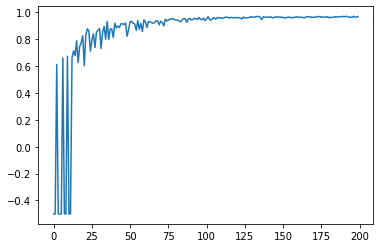

In [8]:
from matplotlib import pyplot as plt
plt.plot(rewards_per_episode,)
plt.show()

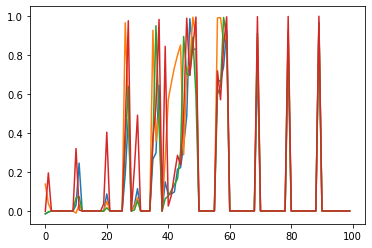

In [9]:
plt.plot(Q_table1)
plt.show()

In [10]:
Q_table1

array([[-1.52489310e-02,  1.37980349e-01, -1.45377830e-02,
        -2.49999555e-03],
       [-5.70733934e-03,  3.78468829e-02, -5.35221372e-03,
         1.95402490e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.62900000e-04, -5.19510000e-04, -6.76779511e-04,
        -3.00000000e-04],
       [-5.69703100e-04, -5.93366100e-04, -5.63900000e-04,
        -6.55677029e-04],
       [ 3.06210202e-02, -1.08901996e-02,  6.68152324e-02,
         3.20544069e-01],
       [ 2.45733937e-01,  3.21319105e-02,  7.39898269e-02,
      

In [11]:
import base64
import io
from IPython import display

video_name = "./vid/Practical_2.mp4"

video = io.open(video_name, 'r+b').read()
encoded = base64.b64encode(video)

display.display(display.HTML(data="""
  <video alt="test" controls>
  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
  </video>
  """.format(encoded.decode('ascii'))))

In [12]:
#realistic

In [21]:
states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
sum1=0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))


# Number of episode we will run
n_episodes = 200

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability to 0.3
exploration_proba = 0.3

#Exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.01

# Minimum of exploration prob
max_exploration_proba = 1
min_exploration_proba = 0.01

# Learning rate
lr = 0.1

rewards_per_episode1 = list()


# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0

    for i in range(max_iter_episode): 
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]
        exploration_rate_threshold=np.random.uniform(0,1)
        if  exploration_rate_threshold> exploration_proba:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))
        else:
          action = env.action_space.sample()

        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        Q_table[current_Q_table_coordinates, action] = (1-lr) *Q_table[current_Q_table_coordinates, action] +lr*(reward + max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state

    #Show the total episode reward        
    print("Total episode reward:", total_episode_reward)
    sum1+=total_episode_reward
    
    #Reset enviroment for next episode
    current_state = env.reset()
    #exploration rate decay
    exploration_proba = min_exploration_proba + (max_exploration_proba - min_exploration_proba) * np.exp(-exploration_decreasing_decay*e)
    rewards_per_episode1.append(total_episode_reward)

    # Save video episode and close
print("Video successfuly saved.")
vid.close()
vid.enabled = False

Total episode reward: 0.5019999999999996
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: -0.5000000000000003
Total episode reward: 0.5309999999999997
Total episode reward: -0.5000000000000003
Total episode reward: 0.6489999999999998
Total episode reward: -0.5000000000000003
Total episode reward: 0.5179999999999996
Total episode reward: 0.8279999999999998
Total episode reward: 0.5819999999999996
Total episode reward: 0.8809999999999999
Total episode reward: 0.8149999999999998
Total episode reward: 0.6449999999999998
Total episode reward: 0.8869999999999999
Total episode reward: 0.7959999999999998
Total episode reward: 0.8099999999999998
Total episode reward: -0.5000000000000003
Total episode reward: 0.8729999999999999
Total episode reward: 0.7629999999999998
Total episode reward: 0.7149999999999999
Total episode reward: 0.8889999999999999
Total ep

In [22]:
print("total reward",sum1)

total reward 173.24499999999995


In [23]:
Q_table2=Q_table

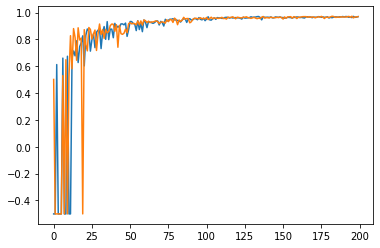

In [24]:
from matplotlib import pyplot as plt
plt.plot(rewards_per_episode,)
plt.plot(rewards_per_episode1,)
plt.show()

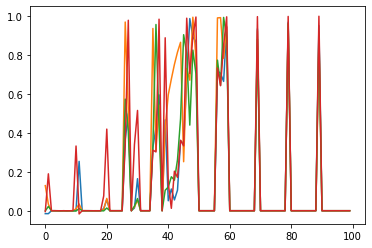

In [25]:
plt.plot(Q_table2)
plt.show()

In [26]:
Q_table2

array([[-1.50523681e-02,  1.28953709e-01, -6.99839872e-04,
        -4.25173184e-03],
       [-1.51613001e-02,  3.32767123e-02,  2.19129889e-02,
         1.89652515e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.90000000e-04, -3.80000000e-04, -3.43900000e-04,
        -1.00000000e-04],
       [-3.43900000e-04, -3.43900000e-04, -6.28312790e-04,
        -3.43900000e-04],
       [-4.02680000e-04, -2.71000000e-04,  0.00000000e+00,
        -1.00000000e-04],
       [-2.71000000e-04, -4.61000000e-04, -5.40461000e-04,
        -4.61000000e-04],
       [-2.00000000e-04, -5.34655210e-04, -2.00000000e-04,
        -2.71000000e-04],
       [-5.58803100e-04, -7.38317010e-04, -7.84824068e-04,
         5.45131910e-04],
       [ 2.01971860e-03,  1.02019977e-02, -1.81137787e-03,
         3.32643443e-01],
       [ 2.53742066e-01,  3.44903462e-02,  1.17050784e-02,
      

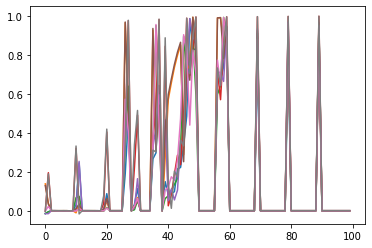

In [27]:
plt.plot(Q_table1)
plt.plot(Q_table2,)
plt.show()

In [28]:
import base64
import io
from IPython import display

video_name = "./vid/Practical_2.mp4"

video = io.open(video_name, 'r+b').read()
encoded = base64.b64encode(video)

display.display(display.HTML(data="""
  <video alt="test" controls>
  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
  </video>
  """.format(encoded.decode('ascii'))))